# Import modules

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.cm as cm
import seaborn as sns

# Load dataset and initialize vars

In [2]:
digits = load_digits()
data = digits.data
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

# PCA

In [3]:
pca = PCA(n_components=10)
data_r = pca.fit(data).transform(data)
print('explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))
print('sum of explained variance (first two components): %s' % str(sum(pca.explained_variance_ratio_)))

explained variance ratio (first two components): [0.14890594 0.13618771 0.11794594 0.08409979 0.05782414 0.0491691
 0.0431598  0.03661355 0.03353199 0.03078781]
sum of explained variance (first two components): 0.738225765217877


# Scatterplot

C:\Users\Prerak\AppData\Local\Temp\ipykernel_14880\3444204925.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data_r[labels == i, 0], data_r[labels == i, 1], c = c, alpha = 0.6)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


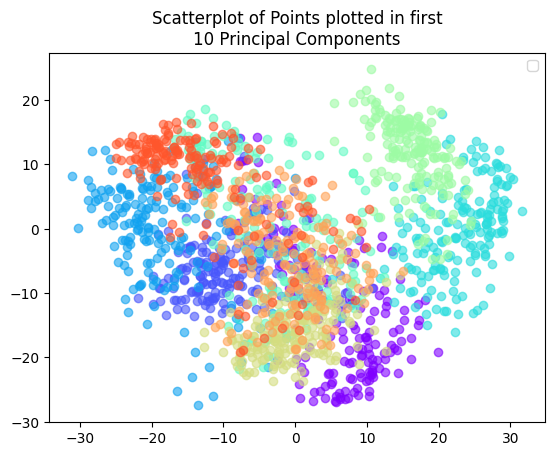

In [4]:
x = np.arange(10)
ys = [i + x + (i * x) ** 2 for i in range(10)]

plt.figure()
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
for c, i, target_name in zip(colors, range(1, 11), labels):
    plt.scatter(data_r[labels == i, 0], data_r[labels == i, 1], c = c, alpha = 0.6)

plt.legend()
plt.title('Scatterplot of Points plotted in first\n10 Principal Components')
plt.show()

# Normalization

In [5]:
data_normalized = scale(data)
data_normalized

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

# Covariance matrix

In [6]:
cov_matrix = np.cov(data_normalized, rowvar=False)
cov_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.00055679,  0.55692803, ..., -0.02988686,
         0.02656195, -0.04391324],
       [ 0.        ,  0.55692803,  1.00055679, ..., -0.04120565,
         0.07263924,  0.08256908],
       ...,
       [ 0.        , -0.02988686, -0.04120565, ...,  1.00055679,
         0.64868875,  0.26213704],
       [ 0.        ,  0.02656195,  0.07263924, ...,  0.64868875,
         1.00055679,  0.62077355],
       [ 0.        , -0.04391324,  0.08256908, ...,  0.26213704,
         0.62077355,  1.00055679]])

# Eigen values and Eigen vectors

In [7]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigen Values")
print(eigenvalues)
print("Eigen vectors")
print(eigenvectors)

Eigen Values
[7.34477606 5.83549054 5.15396118 3.96623597 2.9663452  2.57204442
 2.40600941 2.06867355 1.82993314 1.78951739 1.69784616 1.57287889
 1.38870781 1.35933609 1.32152536 1.16829176 1.08368678 0.99977862
 0.97438293 0.90891242 0.82271926 0.77631014 0.71155675 0.64552365
 0.59527399 0.5765018  0.52673155 0.5106363  0.48686381 0.45560107
 0.44285155 0.42230086 0.3991063  0.39110111 0.36094517 0.34860306
 0.3195963  0.29406627 0.05037444 0.27692285 0.06328961 0.258273
 0.24783029 0.2423566  0.07635394 0.08246812 0.09018543 0.09840876
 0.10250434 0.11188655 0.11932898 0.12426371 0.13321081 0.14311427
 0.217582   0.15818474 0.16875236 0.20799593 0.17612894 0.2000909
 0.18983516 0.         0.         0.        ]
Eigen vectors
[[ 0.          0.          0.         ...  1.          0.
   0.        ]
 [ 0.18223392 -0.04702701  0.02358821 ...  0.          0.
   0.        ]
 [ 0.285868   -0.0595648  -0.05679875 ...  0.          0.
   0.        ]
 ...
 [ 0.103198    0.24261778 -0.0222795

## First Principal Component Visualization

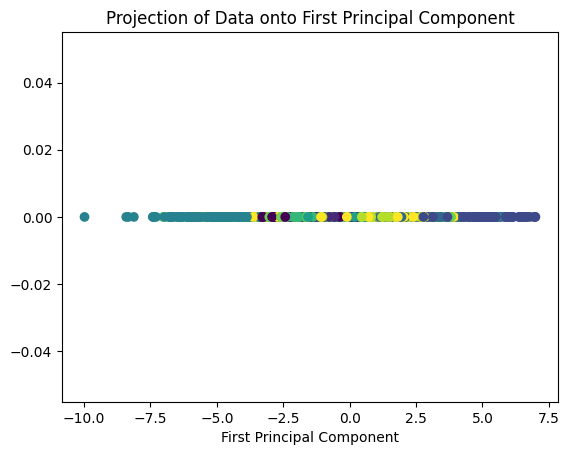

In [8]:
# Select the first principal component
principal_component = eigenvectors[:, 0]

# Project the data onto the first principal component
data_projected = np.dot(data_normalized, principal_component)

# Visualize the projected data
plt.figure()
plt.scatter(data_projected, np.zeros_like(data_projected), c=labels, cmap='viridis')
plt.xlabel('First Principal Component')
plt.title('Projection of Data onto First Principal Component')
plt.show()

# Scree plot

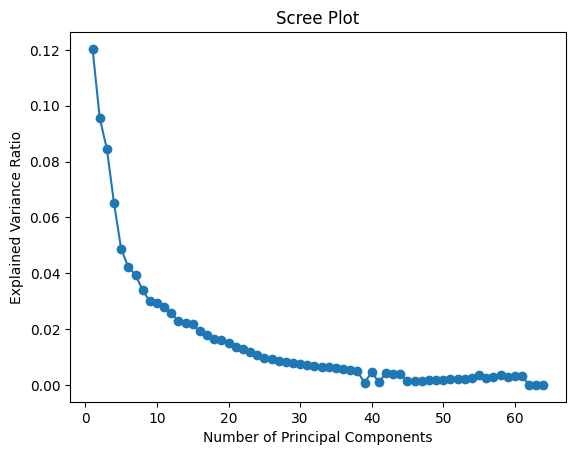

In [9]:
# Compute the explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Plot the scree plot
plt.figure()
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Elbow plot

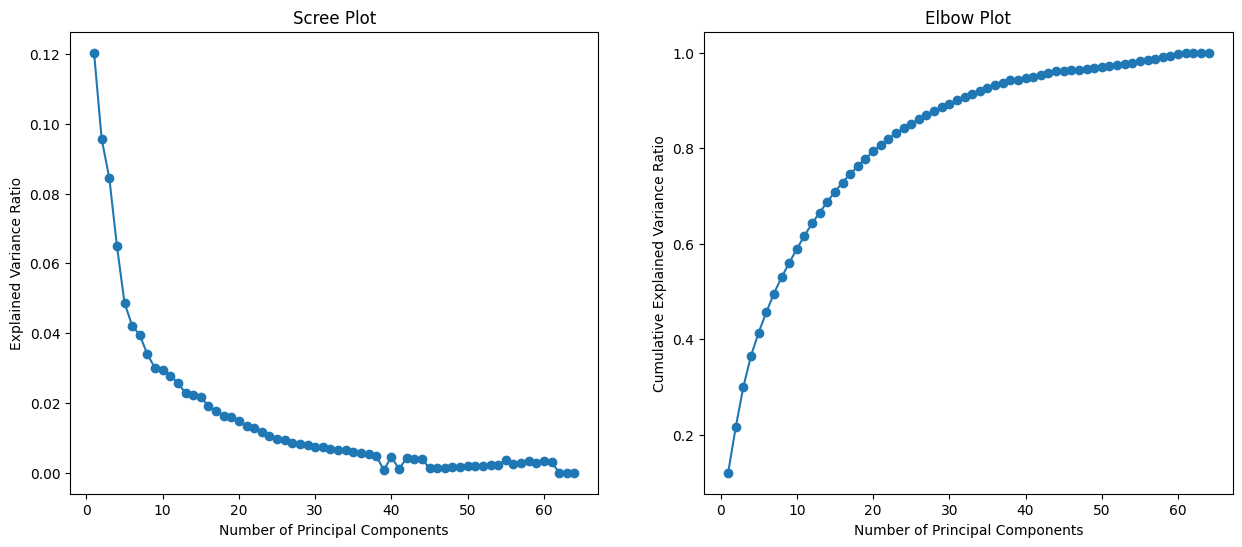

In [10]:
# Compute the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the scree plot
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')

# Plot the elbow plot
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Elbow Plot')

plt.show()